In [ ]:
import os
import glob
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np
import cv2
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torch.nn.functional as F
import torchvision
from torchvision.models.vgg import vgg16
from tensorboardX import SummaryWriter
import numpy as np
import random
import time
import pylab
from skimage.measure import compare_psnr, compare_ssim
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def calc_psnr(im1, im2):
    im1_y = cv2.cvtColor(im1, cv2.COLOR_BGR2YCR_CB)[:, :, 0]
    im2_y = cv2.cvtColor(im2, cv2.COLOR_BGR2YCR_CB)[:, :, 0]
    return compare_psnr(im1_y, im2_y)

def calc_ssim(im1, im2):
    im1_y = cv2.cvtColor(im1, cv2.COLOR_BGR2YCR_CB)[:, :, 0]
    im2_y = cv2.cvtColor(im2, cv2.COLOR_BGR2YCR_CB)[:, :, 0]
    return compare_ssim(im1_y, im2_y)

In [ ]:
def align_to_four(img):
  a_row=int(img.shape[0]/4)*4
  a_col=int(img.shape[1]/4)*4
  img=img[0:a_row,0:a_col]
  return img

def predict(image,model):
  image=image.transpose((2,0,1))
  image=image[np.newaxis,:,:,:]
  image=torch.from_numpy(image)
  image=Variable(image).to(device)

  out=model(image)[-1]
  out=out.cpu().data
  out=out.numpy()
  out=out.transpose((0,2,3,1))
  out=out[0,:,:,:]*255.

  return out

In [ ]:
def minmax_scale(input_arr):
    """
    :param input_arr:
    :return:
    """
    min_val = np.min(input_arr)
    max_val = np.max(input_arr)

    output_arr = (input_arr - min_val) / (max_val - min_val)

    return output_arr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':


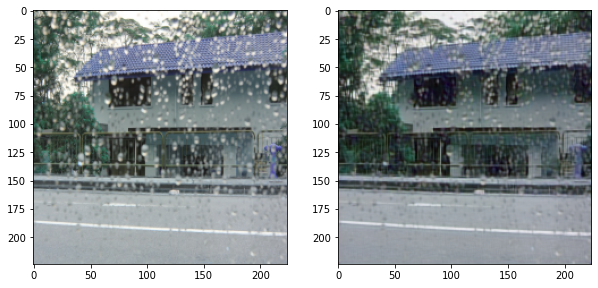

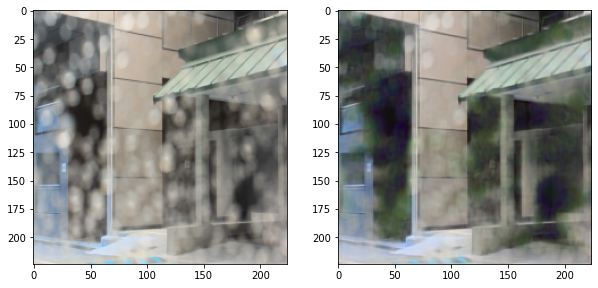

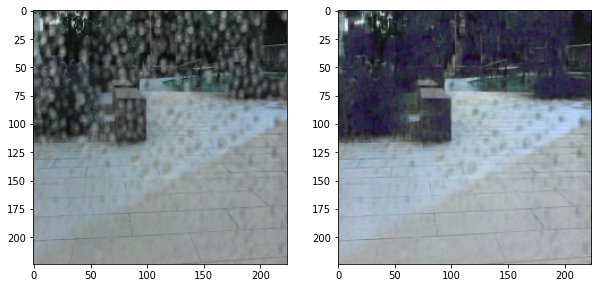

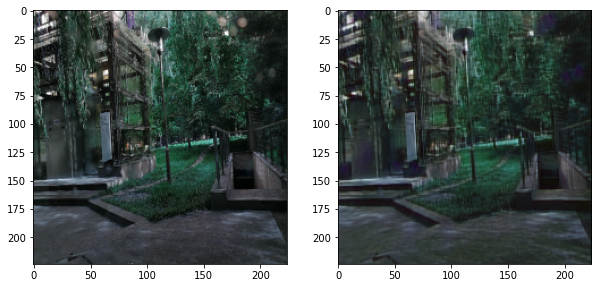

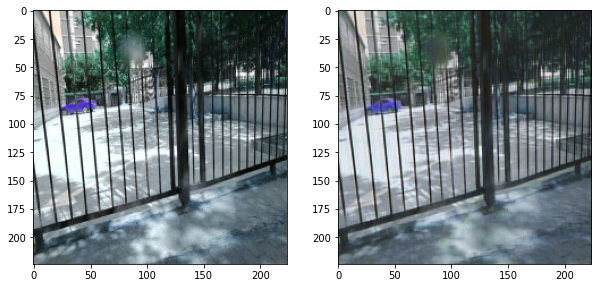

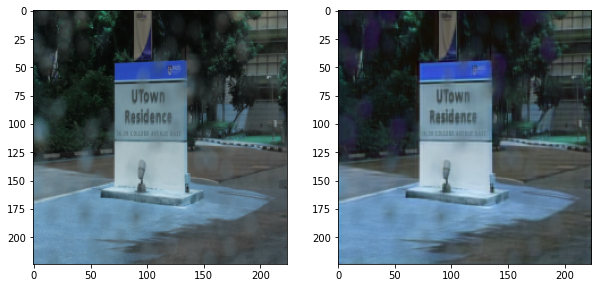

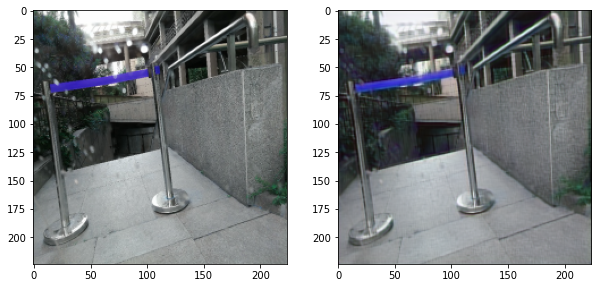

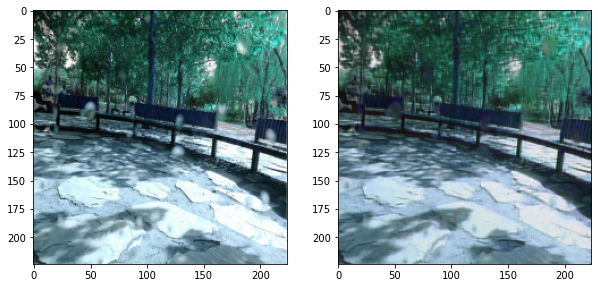

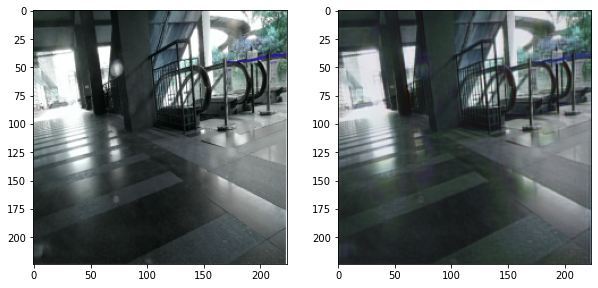

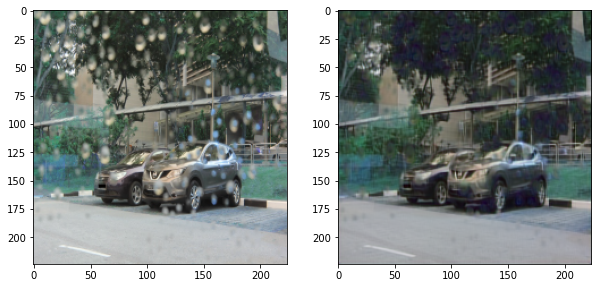

In testing dataset, PSNR is 22.5909 and SSIM is 0.8785


In [ ]:
cumulative_psnr=0
cumulative_ssim=0
num=len(test_dataset)
model=Generator().to(device)
model.load_state_dict(torch.load("./weight/G_epoch_27_PSNR_24.25_SSIM_0.9024.pth"))
with torch.no_grad():
  for i, (I_test,GT_test) in enumerate(test_dataset):
    img=align_to_four(I_test)
    GT=align_to_four(GT_test)
    result=predict(img,model)
    result=minmax_scale(result)
    #result=np.array(result,dtype='uint8')
    cumulative_psnr+=calc_psnr(result,GT)
    cumulative_ssim+=calc_ssim(result,GT)
 
    if i%25==0:
      fig = plt.figure(figsize=(10,10))
      plt.subplot(121)
      plt.imshow(I_test)
      plt.subplot(122)
      plt.imshow(result)
      plt.show()
      
print('In testing dataset, PSNR is %.4f and SSIM is %.4f'%(cumulative_psnr/num, cumulative_ssim/num))